In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns

# Question 1 

For this question, you only need to do programming for Part 1.1 - 1.6. You will only be asked to provide answers in Part 1.7. 

In [52]:
PATH_TO_Q1_DATA = 'data/HW3_Q1_DATA.csv'
df_original = pd.read_csv(PATH_TO_Q1_DATA)

### Data Exploration

In [53]:
df_original.shape

(121913, 19)

In [54]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [55]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121913 entries, 0 to 121912
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Sex                            121913 non-null  object
 1   Intubated                      121789 non-null  object
 2   Pneumonia                      121912 non-null  object
 3   Age                            121913 non-null  int64 
 4   Pregnant                       48676 non-null   object
 5   Diabetes                       121244 non-null  object
 6   COPD                           121329 non-null  object
 7   Asthma                         121328 non-null  object
 8   Immunocompromised              121233 non-null  object
 9   Hypertension                   121304 non-null  object
 10  Other_Disease                  120872 non-null  object
 11  Cardiovascular_disease         121267 non-null  object
 12  Obesity                        121279 non-nu

In [56]:
df_original['Died'].value_counts()

N    89357
Y    32556
Name: Died, dtype: int64

### Encode data

In [57]:
def encode_data_1(df):
    '''
    Encodes categorical data after dropping records with missing values, then returns a DataFrame of the result.
    '''
    
    # drop records with missing values
    df=df_original.dropna()
    print(df.shape)
    
    # convert categorical data to numerical values
    # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
    df=pd.get_dummies(df, drop_first=True)
    print(df.shape)

    return df

In [58]:
df_encoding1 = encode_data_1(df_original)

(23158, 19)
(23158, 19)


In [59]:
df_encoding1.head()

,Age,Intubated_Y,Pneumonia_Y,Pregnant_Y,Diabetes_Y,COPD_Y,Asthma_Y,Immunocompromised_Y,Hypertension_Y,Other_Disease_Y,Cardiovascular_disease_Y,Obesity_Y,Renal_disease_Y,Smoker_Y,Exposure_to_others_with_COVID_Y,Has_COVID_Pending,Has_COVID_Y,ICU_Y,Died_Y
8,25,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
9,52,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0
27,51,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
29,67,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
34,59,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [60]:
df_encoding1.drop('Age',axis='columns').sum(axis='rows')

Intubated_Y                         2561
Pneumonia_Y                        15016
Pregnant_Y                           561
Diabetes_Y                          6751
COPD_Y                              1063
Asthma_Y                             787
Immunocompromised_Y                  943
Hypertension_Y                      7543
Other_Disease_Y                     1023
Cardiovascular_disease_Y            1240
Obesity_Y                           5388
Renal_disease_Y                     1095
Smoker_Y                            1017
Exposure_to_others_with_COVID_Y     7099
Has_COVID_Pending                   2806
Has_COVID_Y                        11905
ICU_Y                               2698
Died_Y                              4020
dtype: int64

In [61]:
# plot data so I can see what shape it takes
y = df_encoding1['Died_Y']
print(y.shape)
X = df_encoding1.drop('Died_Y',axis='columns')
print(X.shape)

(23158,)
(23158, 18)


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

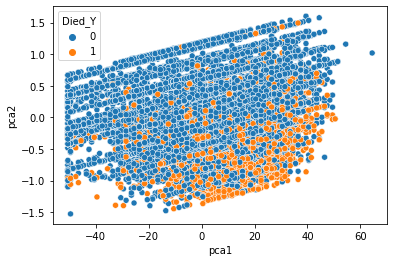

In [62]:
from sklearn.decomposition import PCA

# use PCA to visualize data
pca = PCA(n_components=2).fit_transform(df_encoding1.drop('Died_Y',axis='columns')) 
df_pca_plot = pd.DataFrame(pca, columns=['pca1','pca2'])
df_pca_plot_concat = df_pca_plot.assign(Died_Y=y.values)
sns.scatterplot(x='pca1', y='pca2', data=df_pca_plot_concat, legend='full',hue='Died_Y')

### DataFrame to store classifier metric results for all tests

In [63]:
# dataframe to collect results of all tests
df_results = pd.DataFrame(
    columns=['Test',
             'Description',
             'Accuracy',
             'Sensitivity',
             'Specificity',
             'Pos_Predictive_Val',
             'Neg_Predictive_Val',
             'F1_Score',
             'Matthew_Corr_Coef',
             'AUC'
            ]).astype(
    dtype= {'Test':'int64',
            'Description':'object',
            'Accuracy':'float64',
            'Sensitivity':'float64',
             'Specificity':'float64',
             'Pos_Predictive_Val':'float64',
             'Neg_Predictive_Val':'float64',
             'F1_Score':'float64',
             'Matthew_Corr_Coef':'float64',
             'AUC':'float64'
           })

## Part 1.1 Select features and train classifiers

### Part 1.1 Work 

In [64]:
# TODO: 
#   Step 1: Select and apply a filter-based or wrapper-based feature selection method to the data.
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. You may find the filter-based or wrapper-based methods you used in HW2 useful. 

#   2. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   3. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define wrapper-based feature selection method and classifier
DecisionTree reference: https://www.dezyre.com/recipes/do-recursive-feature-elimination-in-python-decisiontreeregressor

In [65]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

# # version 1 takes a long time
# def perform_feature_selection_wrapper(X,y):
#     svc = SVC(kernel="linear")
#     rfecv = RFECV(estimator=svc, step=1, cv=5,scoring='accuracy',n_jobs=3)
#     return rfecv.fit(X, y)

# # version 2 takes too long
# def perform_feature_selection_wrapper_2(X,y):
#     svc = SVC(gamma=2, C=1)
#     rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(10),scoring='accuracy',n_jobs=3)
#     return rfecv.fit(X, y)

# version 3 is fast
def perform_feature_selection_wrapper_3(X,y):
    dtree = DecisionTreeClassifier(random_state=0)
    rfecv = RFECV(estimator=dtree, step=1, cv=10,scoring='neg_mean_squared_error',n_jobs=3)
    return rfecv.fit(X, y)
  
def get_feature_list(X, support):
    features = list()
    for i,val in enumerate(support):
        if val:
            features.append(X.columns[i]) # feature was selected by wrapper method
        
    return features

In [67]:
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def build_X_from_features(X, list_features):
    return X.loc[:][list_features]

def train_classifier(X,y,k):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k)
    return clf.fit(X, y)

# def train_classifier_3(X,y,k):
#     clf = SVC(gamma=2, C=1)
#     scores = cross_validate(clf, X, y, cv=k,return_estimator=True)
#     return scores

#### Separate encoded data into features and target

In [68]:
y_1_1 = df_encoding1.loc[:]['Died_Y']
print(y_1_1.shape)
X_1_1 = df_encoding1.drop('Died_Y',axis='columns')
print(X_1_1.shape)

(23158,)
(23158, 18)


In [69]:
X_1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23158 entries, 8 to 121906
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              23158 non-null  int64
 1   Intubated_Y                      23158 non-null  uint8
 2   Pneumonia_Y                      23158 non-null  uint8
 3   Pregnant_Y                       23158 non-null  uint8
 4   Diabetes_Y                       23158 non-null  uint8
 5   COPD_Y                           23158 non-null  uint8
 6   Asthma_Y                         23158 non-null  uint8
 7   Immunocompromised_Y              23158 non-null  uint8
 8   Hypertension_Y                   23158 non-null  uint8
 9   Other_Disease_Y                  23158 non-null  uint8
 10  Cardiovascular_disease_Y         23158 non-null  uint8
 11  Obesity_Y                        23158 non-null  uint8
 12  Renal_disease_Y                  23158 non-nu

#### Perform feature selection and classification

In [70]:
# %%time 
# # runtime - 3.4 s (1000 records, 10 fold, 3 cores)
# # runtime - 6 min (10000 records, 10 fold, 3 cores)
# # runtime - 6 min (23158 records, 10 fold, 3 cores)

# # feature selection
# rfecv = perform_feature_selection_wrapper(X_1_1,y_1_1)
# features_wrapper = get_feature_list(X_1_1,rfecv.support_)

In [71]:
# features_wrapper

In [72]:
%%time

# runtime - 1s (23158 records, 10 fold, 3 cores)

rfecv3 = perform_feature_selection_wrapper_3(X_1_1,y_1_1)
features_wrapper3 = get_feature_list(X_1_1,rfecv3.support_)

CPU times: user 434 ms, sys: 55.4 ms, total: 489 ms
Wall time: 2.75 s


In [73]:
features_wrapper3

['Age', 'Intubated_Y']

In [75]:
%%time

# classification
X_1_1_classifier = build_X_from_features(X_1_1,features_wrapper3)
clf_1_1 = train_classifier(X_1_1_classifier,y_1_1,10)

CPU times: user 1.09 s, sys: 21.4 ms, total: 1.11 s
Wall time: 304 ms


In [76]:
# %%time

# #??how to use results when each classifier instance is separate, not like RidgeCV?

# # classification
# scores = train_classifier_3(X_1_1_classifier,y_1_1,10)

In [77]:
# scores.keys()

In [78]:
# scores

In [79]:
# clf_fitted0 = scores['estimator'][0]

In [80]:
# # for validation purposes
# print(clf_fitted0.score(X_1_1_classifier,y_1_1),'\n')

# # calculate confusion matrix
# y_predict = clf_fitted0.predict(X_1_1_classifier)
# y_real = y_1_1
# cm = get_confusion_matrix(y_real,y_predict)

# # calculate metrics
# metrics = calc_classifier_metrics(cm,y_real,y_predict)
# print('\n',metrics)

In [81]:
# clf_fitted9 = scores['estimator'][9]

# # for validation purposes
# print(clf_fitted9.score(X_1_1_classifier,y_1_1),'\n')

# # calculate confusion matrix
# y_predict = clf_fitted9.predict(X_1_1_classifier)
# y_real = y_1_1
# cm = get_confusion_matrix(y_real,y_predict)

# # calculate metrics
# metrics = calc_classifier_metrics(cm,y_real,y_predict)
# print('\n',metrics)

#### Calculate metrics and add row to results DataFrame
- Accuracy
- Sensitivity & Specificity
- The positive and negative predictive values 
- F1-score
- The Matthews Correlation Coefficient
- AUC (Area under the ROC curve)

In [82]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(y_true,y_predict):
    '''
    Calculates the confusion matrix for a given X,y and classifier.
    '''
    # confusion matrix
    cm = confusion_matrix(y_true, y_predict)
    tn, fp, fn, tp = cm.ravel()
    
    return cm

In [83]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

def calc_classifier_metrics(cm, y_true, y_predict):
    
    tn, fp, fn, tp = cm.ravel()
    print('TN:',tn)
    print('FP:',fp)
    print('FN:',fn)
    print('TP:',tp)
    print('TOTAL:',tp + tn + fp + fn)
    
    # accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # positive predictive value
    ppv = tp / (fp + tp) # ?? check correctness
    
    # negative predictive value
    npv = tn / (fn + tn)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    # matthew correlation coefficient
    mcc = matthews_corrcoef(y_true,y_predict)
    
    # area Under the receiver (AUC)
    auc = roc_auc_score(y_true, y_predict)
    
    # return numpy array  
    metrics = [acc,sen,spec,ppv,npv,f1,mcc,auc]
    return metrics

In [84]:
def add_row(df, test, description, metrics):
    
    data = [test,description] + metrics  
    new_row = pd.Series(data, index = df.columns)
    return df.append(new_row,ignore_index=True)

def add_metrics_to_table(df, test, description, X, y, clf):
    
    # for validation purposes
    print(clf.score(X,y),'\n')
    
    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)
    
    # calculate metrics
    metrics = calc_classifier_metrics(cm,y_real,y_predict)
    print('\n',metrics)
    
    # add row to results DataFrame
    return add_row(df, test, description, metrics)

In [85]:
df_results = add_metrics_to_table(df_results, 1, "Wrapper", X_1_1_classifier, y_1_1, clf_1_1)

0.8456257017013559 

TN: 18369
FP: 769
FN: 2806
TP: 1214
TOTAL: 23158

 [0.8456257017013559, 0.30199004975124377, 0.9598181628174313, 0.6122037317196167, 0.8674852420306965, 0.45942882896810733, 0.3543818742634443, 0.6309041062843376]


In [86]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.30199,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904


### Part 1.2 Work 

In [88]:
# TODO: 
#   Step 1: Select a learning algorithm that performs embedded feature selection. 
#   Step 2: Train a classifier using the selected features. Use 10-fold cross validation.

# Tip: 
#   1. Scikit-learn implement many classifiers, see the comparisons of their 
#   performance and introductions here:
#   https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

#   2. Scikit-learn also implement classifiers with built-in cross validations,
#   for example: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html

#### Define embedded feature selection method

In [89]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LassoCV

def perform_feature_selection_embedded(X,y):
    sel = SelectFromModel(RandomForestClassifier())
    return sel.fit(X, y)

# def perform_feature_selection_embedded_2(X,y):
#     clf = AdaBoostClassifier(n_estimators=100, random_state=0)
#     return clf.fit(X, y)

# def perform_feature_selection_embedded_3(X,y):
#     reg = LassoCV()
#     return reg.fit(X, y)

#### Perform feature selection and classification

In [91]:
from sklearn.model_selection import train_test_split

# use same data from 1.1
X_1_2 = X_1_1
y_1_2 = y_1_1

#?? need to do cross fold here
# split data
X_train_embedded,X_test_embedded,y_train_embedded,y_test_embedded = train_test_split(X_1_2,
                                                                                     y_1_2,
                                                                                     test_size=0.25)

In [92]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded, y_train_embedded) #?? revisit to do 10-fold version
features_embedded = get_feature_list(X_train_embedded,rfc.get_support())

CPU times: user 984 ms, sys: 21.8 ms, total: 1.01 s
Wall time: 1.01 s


In [93]:
features_embedded

['Age', 'Intubated_Y', 'Has_COVID_Y']

In [94]:
%%time
#?? choose a different classifier
# classification
X_1_2_classifier = build_X_from_features(X_1_2,features_embedded)
clf_1_2 = train_classifier(X_1_2_classifier,y_1_2,10)

CPU times: user 994 ms, sys: 24.3 ms, total: 1.02 s
Wall time: 292 ms


#### Calculate metrics and add row to results DataFrame

In [95]:
df_results = add_metrics_to_table(df_results, 2, "Embedded", X_1_2_classifier, y_1_2, clf_1_2)

0.8489938682096899 

TN: 18494
FP: 644
FN: 2853
TP: 1167
TOTAL: 23158

 [0.8489938682096899, 0.2902985074626866, 0.9663496708119971, 0.6443953616786305, 0.8663512437344826, 0.4464732006518085, 0.362052739030178, 0.6283240891373417]


In [96]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.628324


### Part 1.3 Work 

In [97]:
# TODO: 
#   Step 1: Select and apply a data imputation method to handle the missing data.
#   Step 2: Apply the  wrapper based feature selection method you used in part 1.1.
#   Step 3: Train a classifier using the selected features. Use the same classifier you used in part 1.1. Use 10-fold cross validation.

# Tip: 
#   1. Sciki-learn implements different imputation methods. Take a look at https://scikit-learn.org/stable/modules/impute.html
#   and use the one you think most appropriate.

#### Impute missing values

In [98]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")

In [102]:
ndarray_imputed = imp.fit_transform(df_original)
ndarray_imputed.shape

(121913, 19)

In [103]:
# convert back to DataFrame
df_imputed = pd.DataFrame(ndarray_imputed, columns=df_original.columns)
df_imputed.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,N,Y,N,N
1,M,N,Y,30,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y
3,M,N,Y,47,N,Y,N,N,N,N,N,N,N,N,N,N,Y,Y,Y
4,M,N,N,63,N,N,N,N,N,Y,N,N,N,N,N,N,Y,N,N


In [104]:
df_original.head()

,Sex,Intubated,Pneumonia,Age,Pregnant,Diabetes,COPD,Asthma,Immunocompromised,Hypertension,Other_Disease,Cardiovascular_disease,Obesity,Renal_disease,Smoker,Exposure_to_others_with_COVID,Has_COVID,ICU,Died
0,F,N,N,54,N,N,N,N,N,N,N,N,Y,N,N,NaN,Y,N,N
1,M,N,Y,30,NaN,N,N,N,N,N,N,N,N,N,N,NaN,Y,N,N
2,F,N,N,60,N,Y,N,N,N,Y,N,Y,N,N,N,NaN,Y,N,Y
3,M,N,Y,47,NaN,Y,N,N,N,N,N,N,N,N,N,NaN,Y,Y,Y
4,M,N,N,63,NaN,N,N,N,N,Y,N,N,N,N,N,NaN,Y,N,N


In [106]:
# convert Age to int64 data type
df_imputed = df_imputed.astype({'Age': 'int64'})

In [107]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121913 entries, 0 to 121912
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Sex                            121913 non-null  object
 1   Intubated                      121913 non-null  object
 2   Pneumonia                      121913 non-null  object
 3   Age                            121913 non-null  int64 
 4   Pregnant                       121913 non-null  object
 5   Diabetes                       121913 non-null  object
 6   COPD                           121913 non-null  object
 7   Asthma                         121913 non-null  object
 8   Immunocompromised              121913 non-null  object
 9   Hypertension                   121913 non-null  object
 10  Other_Disease                  121913 non-null  object
 11  Cardiovascular_disease         121913 non-null  object
 12  Obesity                        121913 non-nu

#### Convert categorical data to numerical

In [108]:
def encode_data_2(df):
    '''
    Encodes categorical data then returns a DataFrame of the result.
    '''
    
    # convert categorical data to numerical values
    # drop one of each of the binary categories because it is not necessary (all info is encoded by one column)
    df=pd.get_dummies(df, drop_first=True)

    return df

In [112]:
df_imputed_encoded = encode_data_2(df_imputed)
df_imputed_encoded.shape

(121913, 20)

In [110]:
df_imputed_encoded.head()

,Age,Sex_M,Intubated_Y,Pneumonia_Y,Pregnant_Y,Diabetes_Y,COPD_Y,Asthma_Y,Immunocompromised_Y,Hypertension_Y,Other_Disease_Y,Cardiovascular_disease_Y,Obesity_Y,Renal_disease_Y,Smoker_Y,Exposure_to_others_with_COVID_Y,Has_COVID_Pending,Has_COVID_Y,ICU_Y,Died_Y
0,54,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,60,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1
3,47,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,63,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [111]:
# separate into features and target 
X_1_3 = df_imputed_encoded.drop('Died_Y', axis='columns')
y_1_3 = df_imputed_encoded['Died_Y']
print(X_1_3.shape)
print(y_1_3.shape)

(121913, 19)
(121913,)


#### Apply wrapper based feature selection

In [113]:
%%time 
# runtime - 23 min (30000 records, 10 fold, 3 cores) with perform_feature_selection_wrapper_1
# runtime - 13 s (120k records, 10 fold, 3 cores) with perform_feature_selection_wrapper_3

# feature selection
rfecv_imputed = perform_feature_selection_wrapper_3(X_1_3,y_1_3)
features_wrapper_imputed = get_feature_list(X_1_3,rfecv_imputed.support_)

CPU times: user 2.55 s, sys: 103 ms, total: 2.65 s
Wall time: 13.4 s


In [114]:
features_wrapper_imputed

['Age', 'Intubated_Y', 'Pneumonia_Y', 'Has_COVID_Y']

#### Train classifier

In [115]:
%%time

# classification
X_1_3_classifier = build_X_from_features(X_1_3,features_wrapper_imputed)
clf_1_3 = train_classifier(X_1_3_classifier,y_1_3,10)

CPU times: user 4.09 s, sys: 114 ms, total: 4.21 s
Wall time: 1.12 s


#### Add classifier metrics to results DataFrame

In [116]:
df_results = add_metrics_to_table(df_results, 
                                  3, 
                                  "Wrapper Imputed", 
                                  X_1_3_classifier, 
                                  y_1_3, 
                                  clf_1_3)

0.7538244485821857 

TN: 86352
FP: 3005
FN: 27007
TP: 5549
TOTAL: 121913

 [0.7538244485821857, 0.17044477208502273, 0.9663708495137482, 0.6487023614683189, 0.7617568962323239, 0.28977937330476716, 0.23697518537451037, 0.5684078107993855]


In [117]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.628324
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.568408


### Part 1.4 Work 

In [118]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in part 1.3. 
#   Step 2: Train a classifier. Use the same classifier you used in part 1.2. Use 10-fold cross validation.

#### Perform feature selection and classification

In [119]:
#?? need to repeat work here if I can just use the values from above
X_1_4=X_1_3
y_1_4=y_1_3

# split data
X_train_embedded_i,X_test_embedded_i,y_train_embedded_i,y_test_embedded_i = train_test_split(
    X_1_4,
    y_1_4,
    test_size=0.25)

In [120]:
%%time

# feature selection
rfc = perform_feature_selection_embedded(X_train_embedded_i, y_train_embedded_i)
features_embedded_imputed = get_feature_list(X_1_4,rfc.get_support())

CPU times: user 5.75 s, sys: 95.8 ms, total: 5.84 s
Wall time: 5.86 s


In [123]:
features_embedded_imputed

['Age', 'Intubated_Y', 'Has_COVID_Y']

In [124]:
%%time

# classification
X_1_4_classifier = build_X_from_features(X_1_4,features_embedded_imputed)
clf_1_4 = train_classifier(X_1_4_classifier,y_1_4,10)

CPU times: user 3.94 s, sys: 85.5 ms, total: 4.02 s
Wall time: 1.06 s


#### Calculate metrics and add row to results DataFrame

In [125]:
df_results = add_metrics_to_table(df_results, 
                                  4, 
                                  "Embedded Imputed", 
                                  X_1_4_classifier, 
                                  y_1_4, 
                                  clf_1_4)

0.752446416706996 

TN: 86572
FP: 2785
FN: 27395
TP: 5161
TOTAL: 121913

 [0.752446416706996, 0.1585268460498833, 0.9688328838255537, 0.6495091870123333, 0.7596233997560697, 0.2724702991462146, 0.22826961193742495, 0.5636798649377184]


In [126]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.628324
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.568408
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.563680


### Part 1.5 Work 

In [99]:
# TODO: 
#   Step 1: Apply a data imputation method to eliminate any missing values in the data. Use the same method you used in parts 1.3 & 1.4. 
#   Step 2: Select a learning algorithm that performs cost-sensitive learning. 
#   Step 3: Adjust the costs until you find a classifier that maximizes the F1-score, subject to the constraint that it achieves 95% sensitivity for the label ‘Y’.  Use 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

#### Apply same data imputation method

In [127]:
#?? need to repeat work here if I can just use the values from above

# separate into features and target 
X_1_5 = X_1_4
y_1_5 = y_1_4

In [128]:
y_1_5.value_counts()

0    89357
1    32556
Name: Died_Y, dtype: int64

#### Feature Selection?

In [129]:
##?? are we performing feature selection here
X_1_5_classifier = X_1_5

#### Find correct weights for cost-sensitive classifier

In [131]:
def train_cost_sensitive_classifier(X,y,k,weights):
    clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=k, class_weight=weights)
    return clf.fit(X, y)

In [132]:
def calc_sensitivity_and_f1(cm):
    
    tn, fp, fn, tp = cm.ravel()
    
    # sensitivity
    sen = tp / (tp + fn)
    
    # specificity
    spec = tn / (tn + fp)
    
    # precision
    prec = tn / (tn + fp)
    
    # f1 score
    f1 = 2 * (prec * sen) / (prec + sen) 
    
    return (sen,f1)

In [133]:
def run_balanced_case(X,y):
    # base case
    clf = train_cost_sensitive_classifier(X,y,10,'balanced')

    # calculate confusion matrix
    y_predict = clf.predict(X)
    y_real = y
    cm = get_confusion_matrix(y_real,y_predict)

    # calculate metrics
    sen,f1 = calc_sensitivity_and_f1(cm)
    print('\nSensitivity:',sen)
    print('F-score:',f1)
    
run_balanced_case(X_1_5_classifier,y_1_5)


Sensitivity: 0.7253655240201499
F-score: 0.6901169345005495


In [134]:
# after zero weight of 0.2, results degraded rapidly
def find_zero_weight_to_maximize_f1(X,y):
    
    zero_weight=0.0
    max_f1=0.0
    zero_weight_for_max=0.0
    while zero_weight < 0.2:
        zero_weight = round(zero_weight + 0.005,3)
        one_weight = round(1 - zero_weight,3)
        
        print(zero_weight,one_weight)
        clf = train_cost_sensitive_classifier(X,y,10,{0:zero_weight, 1:one_weight})

        # calculate confusion matrix
        y_predict = clf.predict(X)
        y_real = y
        cm = get_confusion_matrix(y_real,y_predict)

        # calculate metrics
        sen,f1 = calc_sensitivity_and_f1(cm)
        if sen >= 0.95 and f1 > max_f1:
            max_f1 = f1
            zero_weight_for_max=zero_weight
            
    print('max_f1:',max_f1)
    print('zero_weight for max_f1:',zero_weight_for_max)
    return zero_weight_for_max

#### Calculate metrics for best classifier and add row to results DataFrame

In [135]:
%%time

best_zero = find_zero_weight_to_maximize_f1(X_1_5_classifier,y_1_5)
best_one = round(1-best_zero,3)
print()
print(best_zero)
print(best_one)

0.005 0.995
0.01 0.99
0.015 0.985
0.02 0.98
0.025 0.975
0.03 0.97
0.035 0.965
0.04 0.96
0.045 0.955
0.05 0.95
0.055 0.945
0.06 0.94
0.065 0.935
0.07 0.93
0.075 0.925
0.08 0.92
0.085 0.915
0.09 0.91
0.095 0.905
0.1 0.9
0.105 0.895
0.11 0.89
0.115 0.885
0.12 0.88
0.125 0.875
0.13 0.87
0.135 0.865
0.14 0.86
0.145 0.855
0.15 0.85
0.155 0.845
0.16 0.84
0.165 0.835
0.17 0.83
0.175 0.825
0.18 0.82
0.185 0.815
0.19 0.81
0.195 0.805
0.2 0.8
max_f1: 0.4275058176416951
zero_weight for max_f1: 0.115

0.115
0.885
CPU times: user 5min 54s, sys: 20.6 s, total: 6min 14s
Wall time: 1min 34s


In [136]:
# run classifier using best weights
weights = {0:best_zero, 1:best_one}
clf_1_5 = train_cost_sensitive_classifier(X_1_5_classifier,y_1_5,10,weights)

In [137]:
df_results = add_metrics_to_table(df_results, 
                                  5, 
                                  "Cost Sensitive Imputed", 
                                  X_1_5_classifier, 
                                  y_1_5, 
                                  clf_1_5)

0.45680116148400907 

TN: 24611
FP: 64746
FN: 1477
TP: 31079
TOTAL: 121913

 [0.45680116148400907, 0.954632018675513, 0.27542330203565474, 0.32433081137490216, 0.9433839313094143, 0.4275058176416951, 0.24817171673530442, 0.6150276603555838]


In [138]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.628324
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.568408
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.563680
4,5,Cost Sensitive Imputed,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.615028


### Part 1.6 Work 

In [111]:
# TODO: 
#   Step 1: Implement a function calculating the weighted average F1-score, following 
#       the steps in the homework problem statement.
#   Step 2: Find a classifier that achieves a weighted average F1-score of at least 0.74 using 10-fold cross validation.

# Tip: 
#   1. F1-score: https://en.wikipedia.org/wiki/F1_score
#   2. Scikit-learn supports extending the classifiers to cost-sensitive learning.
#   Take a look at this tutorial: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/

In [139]:
def weighted_f1(cm):
    '''
    Calculates a weighted F1-score using given confusion matrix cm. 
    '''
    
    tn, fp, fn, tp = cm.ravel()
    
    # F1 score computed using label 'Y' as true positive ??
    F_1_Y = tp / (tp + 0.5 * (fp + fn))
    
    # F1 score computed using label 'N' as true negative ??
    F_1_N = tn / (tn + 0.5 * (fp + fn))
    
    # number of instances with label 'Y'
    n_Y = tp + fp
    
    # number of instances with label 'N'
    n_N = tn + fn
    
    
    # calculate weights
    a = n_Y / (n_Y + n_N) #?? check on this
    
    b = n_N / (n_Y + n_N) #?? check on this
    
    
    # calculated weighted f1
    f1_weighted = (a * F_1_Y) + (b * F_1_N) #?? check on this
    
    return f1_weighted

In [140]:
# data
X_1_6 = X_1_5
y_1_6 = y_1_5

In [141]:
# feature selection?
X_1_6_classifier = X_1_6

#### Train a classifier

In [142]:
#?? TODO
clf_1_6 = clf_1_5

#### Calculate metrics and add row to results DataFrame

In [143]:
# calculate confusion matrix
y_predict = clf_1_6.predict(X_1_6_classifier)
y_real = y_1_6
cm = get_confusion_matrix(y_real,y_predict)

print("Weighted F1:",weighted_f1(cm))

Weighted F1: 0.47179952694934546


In [144]:
df_results = add_metrics_to_table(df_results, 
                                  6, 
                                  "Weighted F1", 
                                  X_1_6_classifier, 
                                  y_1_6, 
                                  clf_1_6)

0.45680116148400907 

TN: 24611
FP: 64746
FN: 1477
TP: 31079
TOTAL: 121913

 [0.45680116148400907, 0.954632018675513, 0.27542330203565474, 0.32433081137490216, 0.9433839313094143, 0.4275058176416951, 0.24817171673530442, 0.6150276603555838]


In [145]:
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.628324
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.568408
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.563680
4,5,Cost Sensitive Imputed,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.615028
5,6,Weighted F1,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.615028


### Part 1.7 Work

In [118]:
# Tip:
#   1. Scikit-learn implements different evaluation metrics for classifications,
#   see: https://scikit-learn.org/stable/modules/model_evaluation.html

### Part 1.7 Answers

1. Create a ROC plot with the results from parts 1.1 to 1.6. 
2. Create a table with the following performance metrics for the results from parts 1.1 to 1.6:
    * Accuracy
    * Sensitivity & Specificity
    * The positive and negative predictive values
    * F1-score
    * The Matthews Correlation Coefficient
    * AUC (Area under the ROC curve)

#### ROC Plot Example from 1.1.5

In [146]:
#?? use weighted F1 or regular F1
#?? can we complete ROC plot with the metric information we collected earlier?

In [153]:
from sklearn.metrics import roc_curve

# calculate confusion matrix
y_predict = clf_1_5.predict(X_1_5_classifier)
y_real = y_1_5

print(y_real.shape)
print(y_predict.shape)
    
fpr, tpr, thresholds = roc_curve(y_real, y_predict)
auc = roc_auc_score(y_real, y_predict)

(121913,)
(121913,)


In [154]:
import matplotlib.pyplot as plt

def plot_roc(fpr,tpr,auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='1.5 Cost-Sensitive ROC (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

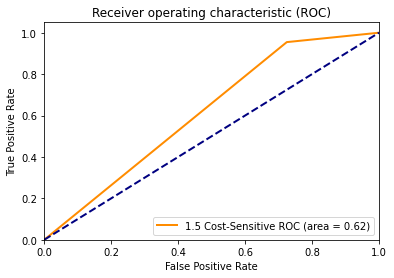

In [155]:
plot_roc(fpr,tpr,auc)

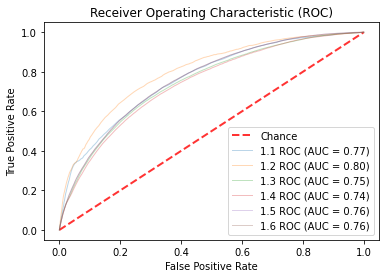

In [156]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="Receiver Operating Characteristic (ROC)")
ax.legend(loc="lower right")

# plot all results on one graph

# 1.1 wrapper method
plot_roc_curve(clf_1_1, X_1_1_classifier, y_1_1,name='1.1 ROC',alpha=0.3, lw=1, ax=ax)

# 1.2 embedded method
plot_roc_curve(clf_1_2, X_1_2_classifier, y_1_2,name='1.2 ROC',alpha=0.3, lw=1, ax=ax)

# 1.3 wrapper method + imputed data
plot_roc_curve(clf_1_3, X_1_3_classifier, y_1_3,name='1.3 ROC',alpha=0.3, lw=1, ax=ax)

# 1.4 embedded method + imputed data
plot_roc_curve(clf_1_4, X_1_4_classifier, y_1_4,name='1.4 ROC',alpha=0.3, lw=1, ax=ax)

# 1.5 cost-sensitive
plot_roc_curve(clf_1_5, X_1_5_classifier, y_1_5,name='1.5 ROC',alpha=0.3, lw=1, ax=ax)

# 1.6 weighted average
plot_roc_curve(clf_1_6, X_1_6_classifier, y_1_6,name='1.6 ROC',alpha=0.3, lw=1, ax=ax)

plt.show()

#### Performance Metric Table

In [165]:
# update AUC values based on ROC plot
def update_auc(test):
    
    auc = 0.0
    if test == 1:
        auc = 0.77
    elif test == 2:
        auc = 0.80
    elif test == 3:
        auc = 0.75
    elif test == 4:
        auc = 0.74
    elif test == 5:
        auc = 0.76
    elif test == 6:
        auc = 0.76
    
    return auc

In [169]:
df_results['AUC_updated'] = df_results["Test"].apply(update_auc)

In [170]:
#?? need something else besides this
#?? update AUC values to match table, why do I need to plot ROC curves that way?
df_results

,Test,Description,Accuracy,Sensitivity,Specificity,Pos_Predictive_Val,Neg_Predictive_Val,F1_Score,Matthew_Corr_Coef,AUC,AUC_updated
0,1,Wrapper,0.845626,0.301990,0.959818,0.612204,0.867485,0.459429,0.354382,0.630904,0.77
1,2,Embedded,0.848994,0.290299,0.966350,0.644395,0.866351,0.446473,0.362053,0.628324,0.80
2,3,Wrapper Imputed,0.753824,0.170445,0.966371,0.648702,0.761757,0.289779,0.236975,0.568408,0.75
3,4,Embedded Imputed,0.752446,0.158527,0.968833,0.649509,0.759623,0.272470,0.228270,0.563680,0.74
4,5,Cost Sensitive Imputed,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.615028,0.76
5,6,Weighted F1,0.456801,0.954632,0.275423,0.324331,0.943384,0.427506,0.248172,0.615028,0.76
